# Red Light Violations Dashboard
## Cleaning, Wrangling, and Transformation

In [45]:
from IPython.display import display, HTML

## Introduction

This dashboard displays the total number of red camera violations in the city of Chicago, Illinois. It includes a count of total violations, a chart with the number of violations per day, and a map with the locations of the red light cameras and number of violations. The interactive graphs were created through Plotly. This work was completed after viewing the December 2018 Kaggle Dashboard Training. 

This notebook contains the data cleaning, wrangling and transformation that was required before the actual dashboard could be created. To see my final version, click <a href="https://nbviewer.jupyter.org/gist/TGasinski/c9ad01131ff6febddb81c5c394dbe18d">here</a>.

## Data Sources

Both datasets, hosted by the City of Chicago, were accessed through Kaggle (https://www.kaggle.com/chicago/chicago-red-light-and-speed-camera-data). 

In [1]:
#import packages
import numpy as np 
import pandas as pd

#import data
red_cam_viol_org = pd.read_csv(r'C:\Users\t_gas\Desktop\Data Portfolio\Dashboard\Red Cameras_Chicago/red-light-camera-violations.csv')
red_cam_loc_org = pd.read_csv(r'C:\Users\t_gas\Desktop\Data Portfolio\Dashboard\Red Cameras_Chicago/red-light-camera-locations.csv')

# Identifying Relevant Information for a Dashboard. 

After looking at the dataset, I think that the following information would be interesting to track in a dashboard: 

* Number of red camera violations, 
* Distribution of violations by day of week, 
* Distrbution of violations by location, and 
* Distribution of violations by camera ID

# Data Validation

Because I will be automatically updating this Dashboard, I want to validate my source dataset to check that the format and content remains as it is now (and to flag the dataset if something significant changes that would affect my Dashboard). 

In [2]:
# install csvvalidator 
import sys
!{sys.executable} -m pip install csvvalidator

In [3]:
# import packages 
from csvvalidator import *

# fields for first dataframe
field_names_1 = ('INTERSECTION', 'VIOLATION DATE', 'VIOLATIONS')

# create validator object
validator_1 = CSVValidator(field_names_1)

# write checks
validator_1.add_value_check('INTERSECTION', str, 'EX1.1', 'Intersection must be a string')
validator_1.add_value_check('VIOLATION DATE', datetime_string('%Y-%m-%d'), 'EX1.2', 'Invalid date')
validator_1.add_value_check('VIOLATIONS', int, 'EX1.3', 'Number of violations not an integer')

# fields for second dataframe
field_names_2 = ('INTERSECTION', 'LONGITUDE', 'LATITUDE')

# create validator object
validator_2 = CSVValidator(field_names_2)

# write checks
validator_2.add_value_check = ('INTERSECTION', str, 'EX2.1', 'Intersection must be a string')
validator_2.add_value_check = ('LONGITUDE', float, 'EX2.2', 'Longitude not a float')
validator_2.add_value_check = ('LATITUDE', float, 'EX2.3', 'Latitude not a float')

In [4]:
# import libraries 
import csv
from io import StringIO

# first sample csv
good_data_1 = StringIO("""INTERSECTION,VIOLATION DATE,VIOLATIONS
Test1-Test2,2014-08-05, 5
Test3-Test4,2014-07-11,12
Test5-Test6,2014-07-04,30
""")

# read text in as a csv
test_csv_1 = csv.reader(good_data_1)

# validate first good csv
validator_1.validate(test_csv_1)

[]

In [5]:
# second sample csv
good_data_2 = StringIO("""INTERSECTION,LONGITUDE,LATITUDE
Test1-Test2, 41.931791, -87.726979
Test3-Test4, 41.924237, -87.746302
Test5-Test6, 41.923676, -87.785441
""")

# read text in as a csv
test_csv_2 = csv.reader(good_data_2)

# validate first good csv
validator_2.validate(test_csv_2)

[]

# Data Cleanup and Munging

In [6]:
#examine dataframe
red_cam_viol_org.head()

INTERSECTION  CAMERA ID                  ADDRESS  \
0                     111TH AND HALSTED     2424.0           800 W 111TH ST   
1                     111TH AND HALSTED     2422.0       11100 S HALSTED ST   
2                     119TH AND HALSTED     2402.0          11900 S HALSTED   
3                     119TH AND HALSTED     2404.0       800 W 119TH STREET   
4  31ST ST AND MARTIN LUTHER KING DRIVE     2121.0  3100 S DR MARTIN L KING   

            VIOLATION DATE  VIOLATIONS  X COORDINATE  Y COORDINATE   LATITUDE  \
0  2019-05-14T00:00:00.000           3  1.172945e+06  1.831283e+06  41.692465   
1  2019-05-14T00:00:00.000           6  1.172924e+06  1.831209e+06  41.692263   
2  2019-05-14T00:00:00.000           9  1.173095e+06  1.825911e+06  41.677721   
3  2019-05-14T00:00:00.000           7  1.173111e+06  1.825985e+06  41.677923   
4  2019-05-14T00:00:00.000           8           NaN           NaN        NaN   

   LONGITUDE                                           LOCATION  \
0 -87.642441  {'longitude': '-87.64244090105778', 'human_add...   
1 -87.642523  {'longitude': '-87.6425226876268', 'human_addr...   
2 -87.642052  {'longitude': '-87.64205184498218', 'human_add...   
3 -87.641990  {'longitude': '-87.64198964584013', 'human_add...   
4        NaN                                                NaN   

   Historical Wards 2003-2015  Zip Codes  Community Areas  Census Tracts  \
0                        45.0    21861.0             74.0          315.0   
1                        45.0    21861.0             74.0          663.0   
2                        45.0    21861.0             50.0          662.0   
3                        45.0    21861.0             50.0          642.0   
4                         NaN        NaN              NaN            NaN   

   Wards  
0   22.0  
1   22.0  
2   22.0  
3   22.0  
4    NaN

Uh-oh! I already see that a lot of information regarding the location of the violations is missing. I will quickly remove these columns from my first dataset.

In [7]:
#remove unnecessary columns

red_cam_viol = red_cam_viol_org[["INTERSECTION", "CAMERA ID", "ADDRESS", "VIOLATION DATE", "VIOLATIONS"]].copy()
red_cam_viol.head()

INTERSECTION  CAMERA ID                  ADDRESS  \
0                     111TH AND HALSTED     2424.0           800 W 111TH ST   
1                     111TH AND HALSTED     2422.0       11100 S HALSTED ST   
2                     119TH AND HALSTED     2402.0          11900 S HALSTED   
3                     119TH AND HALSTED     2404.0       800 W 119TH STREET   
4  31ST ST AND MARTIN LUTHER KING DRIVE     2121.0  3100 S DR MARTIN L KING   

            VIOLATION DATE  VIOLATIONS  
0  2019-05-14T00:00:00.000           3  
1  2019-05-14T00:00:00.000           6  
2  2019-05-14T00:00:00.000           9  
3  2019-05-14T00:00:00.000           7  
4  2019-05-14T00:00:00.000           8

The first piece of information I want is the total number of red camera violations. This should be pretty easy, as the "Violations" column records the number of violations captured by each camera ID on each day. 

In [8]:
# number of red light camera violations 
red_cam_viol["VIOLATIONS"].sum()

2648701

Next, I want to track how many violations, on average, occur on each day of the week. It would also be interesting to track when these violations occur, but unfortunately it looks like there is no time series data available. 

In [9]:
# number of red light camera violations per day

# convert column to "date time"
red_cam_viol["VIOLATION DATE"] = pd.to_datetime(red_cam_viol["VIOLATION DATE"])

# add new column with day of week 
red_cam_viol["Day of Week"] = red_cam_viol["VIOLATION DATE"].dt.day_name()

# create two dictionarys to sort by day of week 
days = {'Monday' : 1, 'Tuesday' : 2, 'Wednesday' : 3, 'Thursday' : 4, 'Friday' : 5, 'Saturday' : 6, 'Sunday' : 7}
days2 = {1: 'Monday', 2: 'Tuesday', 3 : 'Wednesday', 4: 'Thursday', 5 : 'Friday', 6 : 'Saturday', 7 : 'Sunday'}

# group by day of week, sum number of violations, and sort by day of week
viol_per_day = red_cam_viol.groupby(["Day of Week"])["VIOLATIONS"].count()
viol_per_day = viol_per_day.reset_index()
viol_per_day["Day of Week"] = viol_per_day["Day of Week"].map(days)
viol_per_day = viol_per_day.sort_values(by = "Day of Week")
viol_per_day["Day of Week"] = viol_per_day["Day of Week"].map(days2)
viol_per_day.set_index("Day of Week", drop = True, inplace = True)

# plot data
ax = viol_per_day.plot.bar(color = 'b', ylim=[59000, 73000])
ax.set_ylabel("Total Number of Violations")

Text(0, 0.5, 'Total Number of Violations')

Now I want to visualize the geographical distribution of red light camera violations by projecting the number of violations onto a map of Chicago. To do this, I will need the location of each camera. This information wasn't in my first dataset, but let's see if it's in my second dataset. 

In [10]:
red_cam_loc_org.head()

INTERSECTION FIRST APPROACH SECOND APPROACH THIRD APPROACH  \
0  California-Peterson             NB              EB            NaN   
1      Central-Addison             SB              EB            NaN   
2         Western-63rd             NB              EB            NaN   
3         Halsted-79th             NB              EB            NaN   
4          Wacker-Lake             NB              SB            NaN   

              GO LIVE DATE   LATITUDE  LONGITUDE  \
0  2009-06-29T00:00:00.000  41.990442 -87.699401   
1  2010-11-15T00:00:00.000  41.945877 -87.766754   
2  2007-11-12T00:00:00.000  41.779214 -87.683638   
3  2008-04-30T00:00:00.000  41.750643 -87.644043   
4  2018-02-19T00:00:00.000  41.885700 -87.637000   

                                            LOCATION  \
0  {'longitude': '-87.699401', 'human_address': '...   
1  {'longitude': '-87.766754', 'human_address': '...   
2  {'longitude': '-87.683638', 'human_address': '...   
3  {'longitude': '-87.644043', 'human_address': '...   
4  {'longitude': '-87.637', 'human_address': '{"a...   

   Historical Wards 2003-2015  Zip Codes  Community Areas  Census Tracts  \
0                          46       4450               20             15   
1                          25      22254               15            361   
2                          44      22257               64            370   
3                          17      21554               70            556   
4                          22      14914               38             92   

   Wards  
0     24  
1     44  
2      2  
3     31  
4     36

In [11]:
#remove unneeded columns
red_cam_loc = red_cam_loc_org[["INTERSECTION", "LATITUDE", "LONGITUDE"]].copy()
red_cam_loc.head()

INTERSECTION   LATITUDE  LONGITUDE
0  California-Peterson  41.990442 -87.699401
1      Central-Addison  41.945877 -87.766754
2         Western-63rd  41.779214 -87.683638
3         Halsted-79th  41.750643 -87.644043
4          Wacker-Lake  41.885700 -87.637000

Luckily, the second dataset contains information about the Latitude and Longitude of each camera.  Unfortunately, the Camera IDs aren't included in this second dataset. But I noticed that information about the intersection is present in each dataset, so I can merge the datasets on this column and hopefully retrieve information about where the Camera IDs are located. To do this, I will first need to modify the "Intersection" column of the first dataset. 

In [12]:
#remove all caps
red_cam_viol["INTERSECTION"] = red_cam_viol["INTERSECTION"].str.title()

#replace "and" with "-"
red_cam_viol["INTERSECTION"] = red_cam_viol["INTERSECTION"].str.replace(" And ","-")

red_cam_viol.head()

INTERSECTION  CAMERA ID                  ADDRESS  \
0                     111Th-Halsted     2424.0           800 W 111TH ST   
1                     111Th-Halsted     2422.0       11100 S HALSTED ST   
2                     119Th-Halsted     2402.0          11900 S HALSTED   
3                     119Th-Halsted     2404.0       800 W 119TH STREET   
4  31St St-Martin Luther King Drive     2121.0  3100 S DR MARTIN L KING   

  VIOLATION DATE  VIOLATIONS Day of Week  
0     2019-05-14           3     Tuesday  
1     2019-05-14           6     Tuesday  
2     2019-05-14           9     Tuesday  
3     2019-05-14           7     Tuesday  
4     2019-05-14           8     Tuesday

In [13]:
#Before merging, I want to learn a bit more about my datasets. 

null_counts_viol = red_cam_viol.isnull().sum()
print(null_counts_viol)

INTERSECTION        0
CAMERA ID         289
ADDRESS             0
VIOLATION DATE      0
VIOLATIONS          0
Day of Week         0
dtype: int64


In [14]:
red_cam_viol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470528 entries, 0 to 470527
Data columns (total 6 columns):
INTERSECTION      470528 non-null object
CAMERA ID         470239 non-null float64
ADDRESS           470528 non-null object
VIOLATION DATE    470528 non-null datetime64[ns]
VIOLATIONS        470528 non-null int64
Day of Week       470528 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 21.5+ MB


In [15]:
null_counts_loc = red_cam_loc.isnull().sum()
print(null_counts_loc)

INTERSECTION    0
LATITUDE        0
LONGITUDE       0
dtype: int64


In [16]:
red_cam_loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
INTERSECTION    149 non-null object
LATITUDE        149 non-null float64
LONGITUDE       149 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.6+ KB


The first time I merged the two datasets, 241,983 rows contained no "Latitude" and Longitude" data and the Camera ID column went from 552 null values to 630. Because I merged on the "Intersections" columns, I wanted to further explore the data in those columns to see if I can figure out why some data disappeared. My assumption is that the Intersections will be the same for both datasets, but that may not be true.

In [17]:
#create unique lists of intersections within each dataset

loca = np.sort(red_cam_loc['INTERSECTION'].unique())
viol = np.sort(red_cam_viol['INTERSECTION'].unique())

In [18]:
#find values that do not appear in viol lists
def missing(loca, viol): 
    return (list(set(loca) - set(viol)))

missing = missing(loca, viol)
missing.sort()
print(missing)

['Ashland-71st', 'Ashland-87th', 'Ashland-95th', 'Ashland-Cortland', 'Austin-Diversey', 'Broadway-Foster', 'Broadway-Sheridan-Devon', 'California-Irving Park', 'Cicero-47th', 'Cicero-Archer', 'Cicero-Lawrence', 'Cicero-Stevenson NB (SOUTH INTERSECTION)', 'Clark-Chicago', 'Clark-Ridge', 'Cottage Grove-71st-South Chicago', 'Damen-63rd', 'Damen-Diversey-Clybourn', 'Damen-Division', 'Dr Martin Luther King-31st', 'Halsted-111th', 'Halsted-119th', 'Halsted-79th', 'Halsted-95th', 'Halsted-99th', 'Halsted-Fullerton-Lincoln', 'Halsted-Roosevelt', 'Harlem-Addison', 'Homan-Kimball-North', 'Illinois-Columbus', 'Jeffery-95th', 'Kedzie-26th', 'Kedzie-31st', 'Kedzie-47th', 'Kedzie-55th', 'Kedzie-63rd', 'Kedzie-71st', 'Kedzie-79th-Columbus', 'Kedzie-Belmont', 'Kilpatrick-Irving Park', 'Kostner-Grand-North', 'Kostner-Ogden', 'Kostner-Roosevelt', 'LaSalle-Kinzie', 'Lafayette-87th', 'Lake Shore-Belmont', 'Laramie-Irving Park', 'Milwaukee-Diversey', 'Nagle-Foster', 'Narragansett-Fullerton', 'Narragansett-

In [19]:
# find missing values that do not appear in loc list

def missing2(viol, loca): 
    return (list(set(viol) - set(loca)))

missing2 = missing2(viol, loca)
missing2.sort()
print(missing2)

['111Th-Halsted', '115Th-Halsted', '119Th-Halsted', '31St St-Martin Luther King Drive', '31St-California', '35Th-Western', '4700 Western', '55Th-Kedzie', '55Th-Pulaski', '55Th-Western', '63Rd-State', '71St-Ashland', '75Th-State', '79Th-Halsted', '79Th-Kedzie', '83Rd-Stony Island', '87Th-Vincennes', '95Th-Stoney Island', '99Th-Halsted', 'Addison-Harlem', 'Archer-Cicero', 'Archer/Narragansett-55Th', 'Ashland-47Th', 'Ashland-63Rd', 'Ashland-87Th', 'Ashland-95Th', 'Ashland-Archer', 'Ashland-Diversey', 'Belmont-Kedzie', 'Blue Island-Damen', 'Broadway/Sheridan-Devon', 'Cermak-Pulaski', 'Chicago-Clark', 'Cicero-47Th', 'Cicero-I55', 'Columbus-Illinois', 'Cornell Drive-57Th', 'Cortland-Ashland', 'Cottage Grove-71St', 'Cottage Grove-95Th', 'Damen-63Rd', 'Damen-Diversey', 'Diversey-Austin', 'Diversey-Western', 'Division-Damen', 'Elston-Foster', 'Foster-Broadway', 'Foster-Nagle', 'Foster-Northwest Highway', 'Fullerton-Narragansett', 'Garfield-Ashland', 'Grand-Oak Park', 'Halsted-103Rd', 'Halsted-6

I notice right away that there are some problems with capitalization - for example, the intersections in list viol are written with "st" or "th", while the intersections in list loc are written with "St" and "Th". To avoid these kinds of capitalization errors, I will make the columns in each dataframe uppercase.

In [20]:
red_cam_loc['INTERSECTION'] = red_cam_loc['INTERSECTION'].str.upper()
red_cam_viol["INTERSECTION"] = red_cam_viol["INTERSECTION"].str.upper()

I gained a bit more Latitude and Longitude data (from 241,983 missing to 230,165), but there is still more munging to do! Two other problems I noticed: in the loc list, sometimes "?" appear instead of spaces (like in the street "Stony Island", which is also misspelled in the viol list). A second problem is the order of the Intersection streets. In the viol list, one intersection is listed as "California-Irving Park" but in the loc list, the same intersection appears as "Irving Park-California." 

In [21]:
# replace errors found in spot check of lists

red_cam_loc["INTERSECTION"] = red_cam_loc["INTERSECTION"].str.replace("?", " ")
red_cam_viol["INTERSECTION"] = red_cam_viol["INTERSECTION"].str.replace("STONEY", "STONY")
red_cam_viol["INTERSECTION"] = red_cam_viol["INTERSECTION"].str.replace("31ST ST-MARTIN LUTHER KING DRIVE", "DR MARTIN LUTHER KING DRIVE-31ST")
red_cam_viol["INTERSECTION"] = red_cam_viol["INTERSECTION"].str.replace("4700 WESTERN", "47TH-WESTERN")

In [22]:
# resave first list with capitalized letters
loca = np.sort(red_cam_loc['INTERSECTION'].unique())

In [23]:
# create new column
red_cam_viol["Corrected Intersection"] = 'Unchecked'

# divides intersections by hyphen and insert in new column
red_cam_viol["First Street"], red_cam_viol["Second Street"] = red_cam_viol.INTERSECTION.str.split("-", 1).str
red_cam_viol['New Intersection'] = red_cam_viol["Second Street"] + "-" + red_cam_viol["First Street"]

def match(df, loca): 
    df.loc[df['INTERSECTION'].isin(loca), "Corrected Intersection"] = df['INTERSECTION']
    df.loc[(~df['INTERSECTION'].isin(loca)) & (df["New Intersection"].isin(loca)), "Corrected Intersection"] = df['New Intersection'] 
    errors = df.loc[df['Corrected Intersection'] == 'Unchecked']
    errors_list = np.sort(errors['INTERSECTION'].unique())
    return df, errors_list

# call function 
red_cam_viol, errors_list = match(red_cam_viol, loca)
print(errors_list)

['115TH-HALSTED' '31ST-CALIFORNIA' '79TH-KEDZIE' '83RD-STONY ISLAND'
 '95TH-STONY ISLAND' 'ARCHER/NARRAGANSETT-55TH' 'ASHLAND-47TH'
 'ASHLAND-63RD' 'ASHLAND-ARCHER' 'ASHLAND-DIVERSEY' 'BLUE ISLAND-DAMEN'
 'BROADWAY/SHERIDAN-DEVON' 'CICERO-I55' 'CORNELL DRIVE-57TH'
 'COTTAGE GROVE-71ST' 'COTTAGE GROVE-95TH' 'DAMEN-DIVERSEY'
 'DIVERSEY-WESTERN' 'DR MARTIN LUTHER KING DRIVE-31ST' 'ELSTON-FOSTER'
 'FOSTER-NORTHWEST HIGHWAY' 'GARFIELD-ASHLAND' 'GRAND-OAK PARK'
 'HALSTED-103RD' 'HALSTED-63RD' 'HALSTED-83RD' 'HALSTED-FULLERTON'
 'HARLEM-NORTHWEST HWY' 'HOMAN/KIMBALL-NORTH' 'IRVING PARK-KEDZIE'
 'JEFFERY-79TH' 'KIMBALL-DIVERSEY' 'KIMBALL-LINCOLN' 'KOSTNER-NORTH'
 'LAKE SHORE DR-BELMONT' 'LAKE-UPPER WACKER' 'LINCOLN-MCCORMICK'
 'MADISON-CENTRAL' 'NORTHWEST HIGHWAY-FOSTER' 'PERSHING-WESTERN'
 'PULASKI-ARCHER' 'PULASKI-MONTROSE' 'PULASKI-PETERSON'
 'STONY ISLAND-79TH' 'STONY ISLAND/CORNELL-67TH' 'VAN BUREN-WESTERN'
 'VINCENNES-111TH' 'WESTERN-51ST' 'WESTERN-71ST' 'WESTERN-ARMITAGE'
 'WESTERN-PRAT

My function hasn't removed all the errors, so I will have to munge manually. But it's much easier than before to spot these smaller discrepencies! For example, I now notice that a few intersections list three streets instead of two (like "Stony Island/Cornell-67th"), but uses a "/" instead of "-" to divide the streets. 

In [24]:
red_cam_viol["INTERSECTION"] = red_cam_viol["INTERSECTION"].str.replace("/", "-")
red_cam_viol["INTERSECTION"] = red_cam_viol["INTERSECTION"].str.replace("HIGHWAY", "HWY")
red_cam_viol["INTERSECTION"] = red_cam_viol["INTERSECTION"].str.replace("83RD-STONY ISLAND", "STONY ISLAND-83RD")
red_cam_viol["INTERSECTION"] = red_cam_viol["INTERSECTION"].str.replace("95TH-STONY ISLAND", "STONY ISLAND-95TH")
red_cam_viol["INTERSECTION"] = red_cam_viol["INTERSECTION"].str.replace("ARCHER-NARRAGANSETT-55TH", "ARCHER-NARRAGANSETT")
red_cam_viol["INTERSECTION"] = red_cam_viol["INTERSECTION"].str.replace("LAKE-UPPER WACKER", "LAKE-WACKER")
red_cam_loc["INTERSECTION"] = red_cam_loc["INTERSECTION"].str.replace("DR MARTIN LUTHER KING-31ST", "DR MARTIN LUTHER KING DRIVE-31ST")
red_cam_loc["INTERSECTION"] = red_cam_loc["INTERSECTION"].str.replace("LAKE SHORE-BELMONT", "LAKE SHORE DR-BELMONT")
red_cam_loc["INTERSECTION"] = red_cam_loc["INTERSECTION"].str.replace("PULASKI-ARCHER-50TH", "PULASKI-ARCHER")
red_cam_loc["INTERSECTION"] = red_cam_loc["INTERSECTION"].str.replace("KOSTNER-GRAND-NORTH", "KOSTNER-GRAND")
red_cam_loc["INTERSECTION"] = red_cam_loc["INTERSECTION"].str.replace("HOMAN-KIMBALL-NORTH", "HOMAN-KIMBALL")
red_cam_loc["INTERSECTION"] = red_cam_loc["INTERSECTION"].str.replace("WESTERN-DIVERSEY-ELSTON", "WESTERN-DIVERSEY")
red_cam_loc["INTERSECTION"] = red_cam_loc["INTERSECTION"].str.replace("KEDZIE-79TH-COLUMBUS", "KEDZIE-79TH")
red_cam_loc["INTERSECTION"] = red_cam_loc["INTERSECTION"].str.replace("HALSTED-FULLERTON-LINCOLN", "HALSTED-FULLERTON")

In [25]:
#resave list with corrected intersection names
loca = np.sort(red_cam_loc['INTERSECTION'].unique())

#rewrite columns with corrected values
red_cam_viol["First Street"], red_cam_viol["Second Street"] = red_cam_viol.INTERSECTION.str.split("-", 1).str
red_cam_viol['New Intersection'] = red_cam_viol["Second Street"] + "-" + red_cam_viol["First Street"]

# call function again 
red_cam_viol, errors_list = match(red_cam_viol, loca)
print(errors_list)

['115TH-HALSTED' '31ST-CALIFORNIA' 'ARCHER-NARRAGANSETT' 'ASHLAND-47TH'
 'ASHLAND-63RD' 'ASHLAND-ARCHER' 'ASHLAND-DIVERSEY' 'BLUE ISLAND-DAMEN'
 'CICERO-I55' 'CORNELL DRIVE-57TH' 'COTTAGE GROVE-71ST'
 'COTTAGE GROVE-95TH' 'DAMEN-DIVERSEY' 'ELSTON-FOSTER' 'GARFIELD-ASHLAND'
 'GRAND-OAK PARK' 'HALSTED-103RD' 'HALSTED-63RD' 'HALSTED-83RD'
 'HARLEM-NORTHWEST HWY' 'HOMAN-KIMBALL-NORTH' 'IRVING PARK-KEDZIE'
 'JEFFERY-79TH' 'KIMBALL-DIVERSEY' 'KIMBALL-LINCOLN' 'KOSTNER-NORTH'
 'LINCOLN-MCCORMICK' 'MADISON-CENTRAL' 'PERSHING-WESTERN'
 'PULASKI-MONTROSE' 'PULASKI-PETERSON' 'STONY ISLAND-79TH'
 'STONY ISLAND-83RD' 'STONY ISLAND-95TH' 'STONY ISLAND-CORNELL-67TH'
 'VAN BUREN-WESTERN' 'VINCENNES-111TH' 'WESTERN-51ST' 'WESTERN-71ST'
 'WESTERN-ARMITAGE' 'WESTERN-PRATT']


In [26]:
red_cam_viol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470528 entries, 0 to 470527
Data columns (total 10 columns):
INTERSECTION              470528 non-null object
CAMERA ID                 470239 non-null float64
ADDRESS                   470528 non-null object
VIOLATION DATE            470528 non-null datetime64[ns]
VIOLATIONS                470528 non-null int64
Day of Week               470528 non-null object
Corrected Intersection    470528 non-null object
First Street              470528 non-null object
Second Street             470528 non-null object
New Intersection          470528 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 35.9+ MB


It doesn't look like there's much else left to munge. I am a little confused how these street intersections reported red camera violations if there is no camera located there, but for now I will move on with my merge and mapping EDA. 

In [27]:
red_cam_final_org = pd.merge(red_cam_viol, red_cam_loc, left_on = "Corrected Intersection",right_on= "INTERSECTION", how = "left")
red_cam_final_org.head()

INTERSECTION_x  CAMERA ID                  ADDRESS  \
0                     111TH-HALSTED     2424.0           800 W 111TH ST   
1                     111TH-HALSTED     2422.0       11100 S HALSTED ST   
2                     119TH-HALSTED     2402.0          11900 S HALSTED   
3                     119TH-HALSTED     2404.0       800 W 119TH STREET   
4  DR MARTIN LUTHER KING DRIVE-31ST     2121.0  3100 S DR MARTIN L KING   

  VIOLATION DATE  VIOLATIONS Day of Week            Corrected Intersection  \
0     2019-05-14           3     Tuesday                     HALSTED-111TH   
1     2019-05-14           6     Tuesday                     HALSTED-111TH   
2     2019-05-14           9     Tuesday                     HALSTED-119TH   
3     2019-05-14           7     Tuesday                     HALSTED-119TH   
4     2019-05-14           8     Tuesday  DR MARTIN LUTHER KING DRIVE-31ST   

                  First Street Second Street  \
0                        111TH       HALSTED   
1                        111TH       HALSTED   
2                        119TH       HALSTED   
3                        119TH       HALSTED   
4  DR MARTIN LUTHER KING DRIVE          31ST   

                   New Intersection                    INTERSECTION_y  \
0                     HALSTED-111TH                     HALSTED-111TH   
1                     HALSTED-111TH                     HALSTED-111TH   
2                     HALSTED-119TH                     HALSTED-119TH   
3                     HALSTED-119TH                     HALSTED-119TH   
4  31ST-DR MARTIN LUTHER KING DRIVE  DR MARTIN LUTHER KING DRIVE-31ST   

    LATITUDE  LONGITUDE  
0  41.692355 -87.642377  
1  41.692355 -87.642377  
2  41.677815 -87.641907  
3  41.677815 -87.641907  
4  41.838419 -87.617465

In [28]:
null_counts_merged = red_cam_final_org.isnull().sum()
print(null_counts_merged)

INTERSECTION_x                0
CAMERA ID                   289
ADDRESS                       0
VIOLATION DATE                0
VIOLATIONS                    0
Day of Week                   0
Corrected Intersection        0
First Street                  0
Second Street                 0
New Intersection              0
INTERSECTION_y            55130
LATITUDE                  55130
LONGITUDE                 55130
dtype: int64


In [29]:
red_cam_final_org.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 470528 entries, 0 to 470527
Data columns (total 13 columns):
INTERSECTION_x            470528 non-null object
CAMERA ID                 470239 non-null float64
ADDRESS                   470528 non-null object
VIOLATION DATE            470528 non-null datetime64[ns]
VIOLATIONS                470528 non-null int64
Day of Week               470528 non-null object
Corrected Intersection    470528 non-null object
First Street              470528 non-null object
Second Street             470528 non-null object
New Intersection          470528 non-null object
INTERSECTION_y            415398 non-null object
LATITUDE                  415398 non-null float64
LONGITUDE                 415398 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(8)
memory usage: 50.3+ MB


I now only have 45,637 rows without Latitude and Longitude data, as opposed to over 240,000 before munging. Next, I'm going to clean up my final dataset a little.

In [30]:
red_cam_final_org["INTERSECTION_y"] = np.where(red_cam_final_org["INTERSECTION_y"].isnull(), red_cam_final_org["INTERSECTION_x"], red_cam_final_org["INTERSECTION_x"])

In [31]:
red_cam_final = red_cam_final_org[["INTERSECTION_y", "CAMERA ID", "LATITUDE", "LONGITUDE", "VIOLATION DATE", "VIOLATIONS"]].copy()
red_cam_final.rename(columns = {"INTERSECTION_y" : "INTERSECTION"}, inplace = True)
red_cam_final.head()

INTERSECTION  CAMERA ID   LATITUDE  LONGITUDE  \
0                     111TH-HALSTED     2424.0  41.692355 -87.642377   
1                     111TH-HALSTED     2422.0  41.692355 -87.642377   
2                     119TH-HALSTED     2402.0  41.677815 -87.641907   
3                     119TH-HALSTED     2404.0  41.677815 -87.641907   
4  DR MARTIN LUTHER KING DRIVE-31ST     2121.0  41.838419 -87.617465   

  VIOLATION DATE  VIOLATIONS  
0     2019-05-14           3  
1     2019-05-14           6  
2     2019-05-14           9  
3     2019-05-14           7  
4     2019-05-14           8

For my mapping, I've decided to concentrate on the total number of violations per intersection. This means I will have to manipulate my red_cam_final dataframe to create a new dataframe, which I can then re-merge with the original dataframe to retrieve the location data. I used ideas from: https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972 and https://towardsdatascience.com/exploring-and-visualizing-chicago-transit-data-using-pandas-and-bokeh-part-ii-intro-to-bokeh-5dca6c5ced10 for help plotting. 

In [32]:
intersection_grouped = red_cam_final.groupby("INTERSECTION")
intersection_summed = pd.DataFrame(intersection_grouped["VIOLATIONS"].sum())
intersection_summed.head()

VIOLATIONS
INTERSECTION               
111TH-HALSTED         17919
115TH-HALSTED         16979
119TH-HALSTED         15337
31ST-CALIFORNIA        1053
35TH-WESTERN          10733

In [33]:
red_cam_totals = pd.merge(intersection_summed,red_cam_final,left_on = "VIOLATIONS", right_index = True)
red_cam_totals = red_cam_totals[["VIOLATIONS", "LATITUDE", "LONGITUDE"]].copy()

# set 100 as scale factor
red_cam_totals["SCALE"] = red_cam_totals["VIOLATIONS"] / 100
red_cam_totals.head()

VIOLATIONS   LATITUDE  LONGITUDE   SCALE
INTERSECTION                                             
111TH-HALSTED         17919  41.692355 -87.642377  179.19
115TH-HALSTED         16979  41.998190 -87.660545  169.79
119TH-HALSTED         15337        NaN        NaN  153.37
31ST-CALIFORNIA        1053  41.830280 -87.685033   10.53
35TH-WESTERN          10733  41.960632 -87.754476  107.33

Now I need to convert the Latitude and Longitude into x and y tuples. 

In [35]:
# import libraries
from shapely.geometry import Point, Polygon 
import matplotlib.pyplot as plt
import geopandas as gpd 
import descartes

In [36]:
#convert to a geo-dataframe
geometry = [Point(xy) for xy in zip(red_cam_totals['LONGITUDE'], red_cam_totals['LATITUDE'])]
crs = {'init','epsg:4326'}
gdf = gpd.GeoDataFrame(red_cam_totals, crs=crs, geometry=geometry)

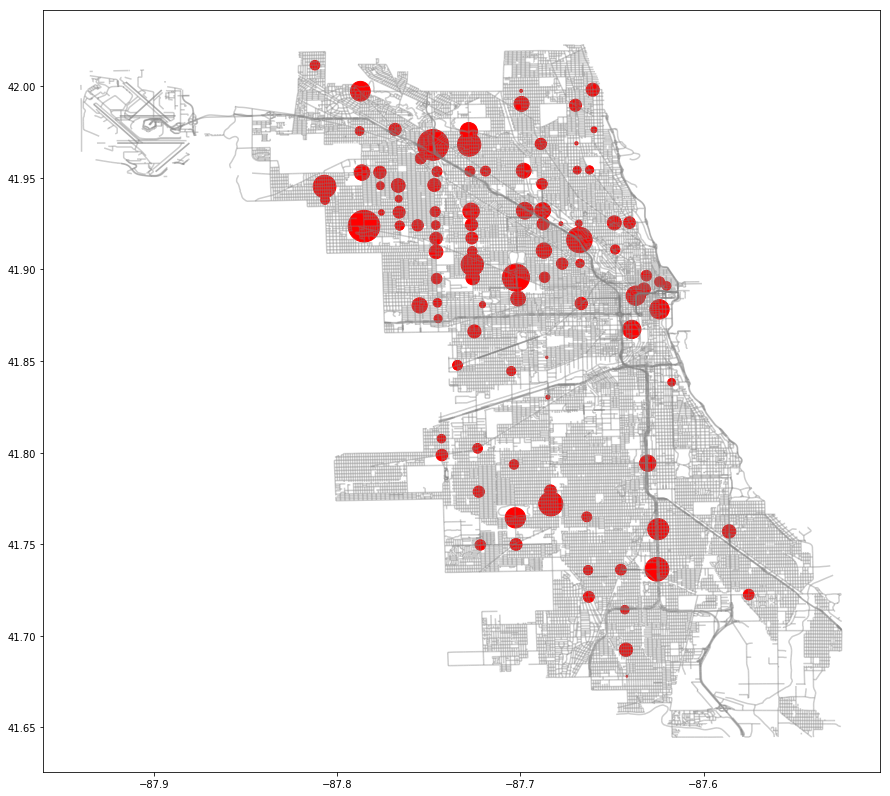

In [38]:
#plot red light cameras onto city map
street_map = gpd.read_file(r'C:\Users\t_gas\Desktop\Data Portfolio\Dashboard\Red Cameras_Chicago\Street Center Lines/geo_export_75808441-05b9-4a51-a665-cf23dcf0a285.shx')
fig,ax = plt.subplots(figsize = (15,15))
street_map.plot(ax = ax, alpha = 0.4, color = "grey")
gdf.plot(ax=ax, markersize=red_cam_totals["SCALE"], marker="o", color="red")

For an actual dashboard, my charts, graphs and maps would be more interactive, to allow other users to modify the data as they see fit. Other tips (from Kaggle's Dasbhoarding tutorial) include: 

* Hiding code, 
* Removing text, and 
* Consolidating charts and tables on the same line when possible

In [39]:
viol_per_day = viol_per_day.reset_index()
viol_per_day.head()

Day of Week  VIOLATIONS
0      Monday       66187
1     Tuesday       66723
2   Wednesday       66830
3    Thursday       67303
4      Friday       68363

In [40]:
#import plotly 
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode()

In [41]:
data = [
    go.Scatter(x=viol_per_day['Day of Week'], y=viol_per_day['VIOLATIONS'], marker=dict(color='rgb(158,202,225)', line=dict(color='rgb(8,48,107)', width=1.5,)),
    opacity=0.6)]

layout = go.Layout(autosize = True, title="Red Light Camera Violations per Day", xaxis={'title':'Days of Week'}, yaxis={'title':'Total Violations'})

fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [42]:
# reset index to convert dataframe from geo to plotly
gdf_2 = gdf.reset_index()
gdf_2['TEXT'] = gdf_2['INTERSECTION'] + ": " + gdf_2['VIOLATIONS'].astype(str) + ' total violations'

In [43]:
#Instead of using scaled data, I will normalize the "VIOLATIONS" column.

# normalize data using min-max 
gdf_2["NORMALIZED"] = (gdf_2["VIOLATIONS"] - gdf_2["VIOLATIONS"].min()) / (gdf_2["VIOLATIONS"].max() - gdf_2["VIOLATIONS"].min())

In [44]:
mapbox_access_token = 'pk.eyJ1IjoidGdhc2luc2tpIiwiYSI6ImNqcXc3MjhpNzEzMnYzeG9ieDNkb2M5ZmQifQ.m3MsgcBIXdwOT6hxvi007g'

data = [
    go.Scattermapbox(
        lat= gdf_2['LATITUDE'],
        lon= gdf_2['LONGITUDE'],
        mode='markers',
        text = gdf_2['TEXT'],
        hoverinfo = 'text',
        marker=dict(
            size= 8,
            color = gdf_2['NORMALIZED'],
            colorscale= 'Jet', 
            showscale=True,
            cmax=1,
            cmin=0),),]

layout = go.Layout(
    title = "Number of Total Red Light Violations by Intersection in Chicago", 
    autosize=True,  
    hovermode='closest',
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=41.881832,
            lon=-87.623177),
        pitch=0,
        zoom=10),)

fig = dict(data=data, layout=layout)
iplot(fig)

In [47]:
# export all dataframes to .csv files 

red_cam_viol.to_csv("red_cam_viol.csv")
viol_per_day.to_csv("viol_per_day.csv")
gdf_2.to_csv("gdf_2.csv")